In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data2/Sdf16_1a.txt', sep='\t')
df.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [4]:
language_df = pd.read_csv('../data2/rla-achievement-lea-sy2016-17.csv')
language_df = language_df[language_df['ALL_RLA00PCTPROF_1617'].str.contains('PS') == False]
language_df.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_RLA00NUMVALID_1617,ALL_RLA00PCTPROF_1617,MAM_RLA00NUMVALID_1617,MAM_RLA00PCTPROF_1617,...,MIG_RLA05NUMVALID_1617,MIG_RLA05PCTPROF_1617,MIG_RLA06NUMVALID_1617,MIG_RLA06PCTPROF_1617,MIG_RLA07NUMVALID_1617,MIG_RLA07PCTPROF_1617,MIG_RLA08NUMVALID_1617,MIG_RLA08PCTPROF_1617,MIG_RLAHSNUMVALID_1617,MIG_RLAHSPCTPROF_1617
0,ALABAMA,1,100005,AL-101,Albertville City,12APR18,2797,28,3,PS,...,22,LE20,22,LE20,18,21-39,14,LT50,20,LE20
1,ALABAMA,1,100006,AL-048,Marshall County,12APR18,2969,34,11,GE50,...,5,PS,4,PS,1,PS,3,PS,3,PS
2,ALABAMA,1,100007,AL-158,Hoover City,12APR18,7421,58,8,LT50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,AL-169,Madison City,12APR18,5578,69,33,60-69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,AL-167,Leeds City,12APR18,997,33,3,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Problem 1

#### Rank and visualize the states that take in the most federal funding (revenue). Which states spend the most federal funding per student?

In [5]:
states = df[['STNAME', 'TFEDREV', 'TOTALEXP', 'V33']]
states = states.groupby(['STNAME']).sum().reset_index().sort_values(by='TFEDREV')
states['TotalPerStudent'] = states['TOTALEXP'] / states['V33'] 
states.head()

,STNAME,TFEDREV,TOTALEXP,V33,TotalPerStudent
45,Vermont,111890912,2102744912,86273,24373.151647
50,Wyoming,123011974,2034228974,94709,21478.729308
7,Delaware,144706995,2218344995,134840,16451.683440
34,North Dakota,155452961,1963629961,108530,18092.969326
29,New Hampshire,169165780,3124777780,179514,17406.875118


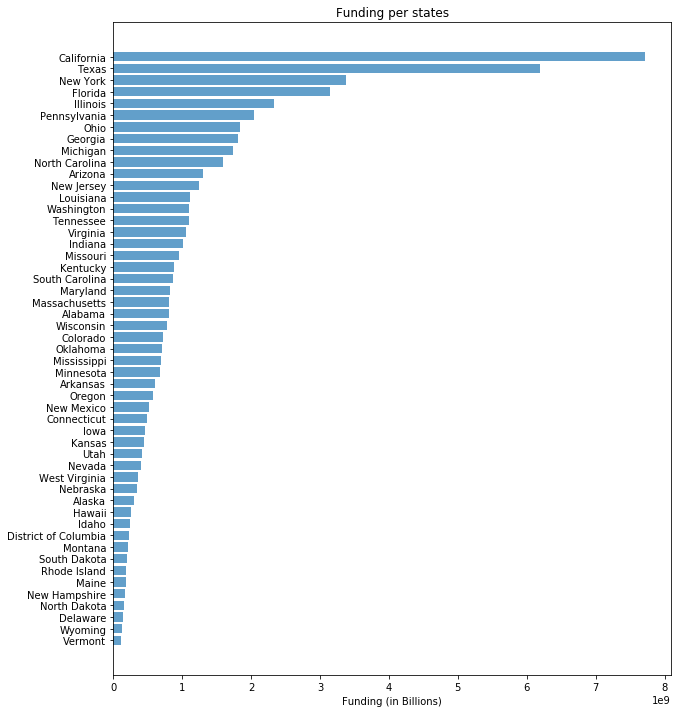

Top 10 states with highest spending per students are


,STNAME,TotalPerStudent
0,District of Columbia,27321.558193
1,New York,25234.981198
2,Vermont,24373.151647
3,New Jersey,21640.774037
4,Wyoming,21478.729308
5,Connecticut,20976.924089
6,Alaska,19799.769017
7,Pennsylvania,19216.042560
8,Massachusetts,18335.450837
9,North Dakota,18092.969326


In [6]:
plt.figure(figsize=(10,12))
plt.barh(states['STNAME'], states['TFEDREV'], align='center', alpha=0.7)
y_pos = np.arange(len(states))
plt.yticks(y_pos, states['STNAME'])
plt.xlabel('Funding (in Billions)')
plt.title('Funding per states')
plt.savefig('Q1-A.png')
plt.show()
print('Top 10 states with highest spending per students are')
states.sort_values(by='TotalPerStudent', ascending=False).head(10).reset_index()[['STNAME', 'TotalPerStudent']]

# Problem 2

#### Visualize the relationship between school districts’ total revenue and expenditures. Which states have the most debt per student?

In [7]:
districts = df[['LEAID', 'NAME','TOTALREV', 'TOTALEXP', '_41F', '_66V', 'V33']]
districts = districts[districts['TOTALREV'] > 0]
districts = districts[districts['V33'] > 0]
districts['SpendRate'] = districts['TOTALEXP'] / districts['TOTALREV']
districts['TotalDebt'] = districts['_41F'] + districts['_66V']
districts['TotalDebtPerStudent'] = districts['TotalDebt'] / districts['V33']
districts.head()

,LEAID,NAME,TOTALREV,TOTALEXP,_41F,_66V,V33,SpendRate,TotalDebt,TotalDebtPerStudent
1,100005,Albertville City,49795000,46778000,34381000,0,5214,0.939412,34381000,6593.977752
2,100006,Marshall County,56422000,64739000,27766000,0,5635,1.147407,27766000,4927.417924
3,100007,Hoover City,168040000,165436000,288730000,0,13910,0.984504,288730000,20757.009346
4,100008,Madison City,105927000,101154000,120371000,0,10011,0.954941,120371000,12023.873739
6,100011,Leeds City,27699000,32285000,37833000,0,1905,1.165566,37833000,19859.842520


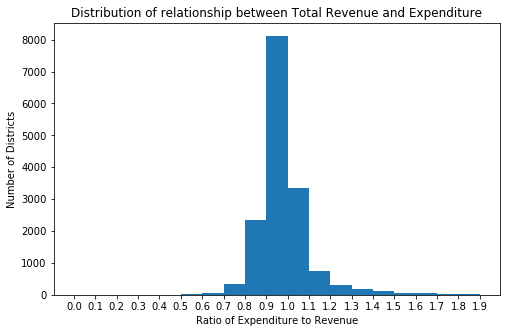

Top 10 states with most debt spending per students are


,NAME,TotalDebtPerStudent
0,Quitman County,730599.369085
1,NETT LAKE PUBLIC SCHOOL DISTRICT,289420.560748
2,West-MEC - Western Maricopa Education Center,173384.798100
3,MOSQUERO MUNICIPAL SCHOOLS,138000.000000
4,CRAIG CO PBLC SCHS,137027.287319
5,IVANHOE PUBLIC SCHOOL DISTRICT,132250.000000
6,MIAMI ISD,130281.690141
7,WILDORADO ISD,120291.262136
8,RANKIN ISD,112989.323843
9,Emery Unified,100957.020057


In [8]:
plt.figure(figsize=(8,5))
plt.hist(districts['SpendRate'].values, bins=np.arange(0, 2, 0.1))
plt.xticks(np.arange(0, 2, 0.1))
plt.xlabel('Ratio of Expenditure to Revenue')
plt.ylabel('Number of Districts')
plt.title('Distribution of relationship between Total Revenue and Expenditure')
plt.savefig('Q2-A.png')
plt.show()
print('Top 10 states with most debt spending per students are')
districts.sort_values(by='TotalDebtPerStudent', ascending=False).head(10) \
                .reset_index()[['NAME', 'TotalDebtPerStudent']]


# Problem 3
#### The district-level performance metrics from EDFacts may be useful in your decision. However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In addition, censored and missing data must be imputed. Write and explain a function for processing a single column of “blurred” metrics into usable numeric values. Use it to process and then visualize the distribution of a performance metric of your choice.

In [9]:
def parseScore(sc):
    try:
         return int(sc)
    except:
        if '-' in sc:
            x = sc.split('-')
        elif 'LE' in sc or 'LT' in sc:
            x = [0, sc[2:]]
        else:
            x = [100, sc[2:]]
        return (int(x[0]) + int(x[1])) // 2
language_df['ParsedScores'] = language_df['ALL_RLA00PCTPROF_1617'].apply(parseScore)

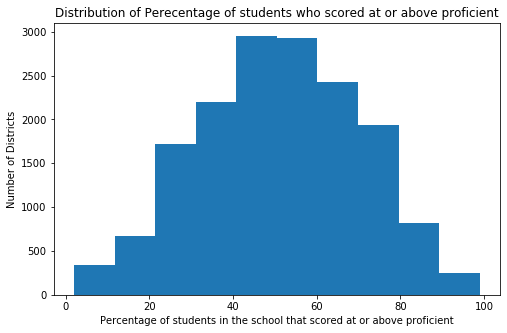

In [10]:
plt.figure(figsize=(8,5))
plt.hist(language_df['ParsedScores'])
plt.xlabel('Percentage of students in the school that scored at or above proficient')
plt.ylabel('Number of Districts')
plt.title('Distribution of Perecentage of students who scored at or above proficient')
plt.savefig('Q3.png')
plt.show()

# Problem 4
#### You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts. How much money is this? Choose which school districts will have their funding cut and how this will be done. (You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut you do not need print the entire table.)

In [11]:
budget = np.sum(df['TFEDREV'].values)
cut = int(budget * 0.15)
print('Total Budget : ' + str(budget))
print('15% of Total Budget : ' + str(cut))
cutting_df = pd.merge(df[['LEAID', 'TFEDREV']], language_df[['LEAID', 'ParsedScores']], on='LEAID')
cutting_df = cutting_df[cutting_df['TFEDREV'] > 0]
print('Total Districts : ' + str(cutting_df.shape[0]))
top = cutting_df[cutting_df['ParsedScores'] > \
                   (np.mean(cutting_df['ParsedScores']) - np.std(cutting_df['ParsedScores']))]
print('Districts with percentage of proficent students greater than 1 standard diviation less than from mean : '  \
      + str(top.shape[0]))

Total Budget : 55602739138
15% of Total Budget : 8340410870
Total Districts : 7217
Districts with percentage of proficent students greater than 1 standard diviation less than from mean : 5946


In [12]:
top['Rate'] = (top['TFEDREV'] * 0.25) + (top['ParsedScores'] * 0.75)
total = np.sum(top['Rate'])
top['Normalized'] = top['Rate'] / total
top['BudgetCut'] = round(top['Normalized'] * cut, 2)
top['NewBudget'] = top['TFEDREV'] - top['BudgetCut']
top[['LEAID', 'BudgetCut', 'NewBudget']].head(20)

,LEAID,BudgetCut,NewBudget
1,100006,3815607.36,3931392.64
2,100007,2998551.14,3089448.86
3,100008,2466152.62,2540847.38
4,100011,749665.12,772334.88
5,100012,1210182.23,1246817.77
6,100013,478330.59,492669.41
7,100030,1830749.32,1886250.68
8,100060,1162407.73,1197592.27
10,100100,760543.42,783456.58
11,100120,1472701.62,1517298.38


# Problem 5
#### Provide a statement for your supervisor justifying your decisions on which school districts will lose funding.

Since the budget plays an important factor in functioning of school, penalising schools with lower score would not be the right thing to do. However, schools already doing well can have some budget cut and over all effect would not be as high.

Hence, we take all the schools who's percentage of proficient student fall above a threshold, in our case 1 standard deviation below the mean, and reduce the budget as a weighted result of total current budget and percentage of proficient student which makes sure schools with higher budget and higher score are penalised more than schools with lower budget and higher score. Similarly lower budget and lower scores are also penalised less.